In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

In [2]:
train_set = pd.read_csv('./train_values.csv', index_col=0)
train_label = pd.read_csv('./train_labels.csv', index_col=0)

In [3]:
dummy = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
dummy_col = pd.get_dummies(train_set[dummy])
train_set_combined = pd.concat([train_set, dummy_col],axis=1)
train_set_combined.drop(dummy, axis=1, inplace=True)

In [4]:
scaler = StandardScaler()
train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']] = scaler.fit_transform(train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']])

In [5]:
train_set_combined

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,1.381653,1.536007,-1.271644,-1.552536,0.386932,-0.459460,-1.268946,0,1,0,...,0,0,0,1,0,0,0,0,1,0
669485,0.385835,0.033741,-1.151250,-0.178274,-0.360698,-0.459460,-0.226419,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602512,0.385835,-1.575137,0.522472,1.195989,0.386932,-0.459460,0.816109,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_set_combined, train_label, test_size=0.2, random_state=42)

In [7]:
for i in range(1,25,1):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Depth: ",i," Accuracy:",metrics.accuracy_score(y_test, y_pred))


Depth:  1  Accuracy: 0.5657412559237159
Depth:  2  Accuracy: 0.5657412559237159
Depth:  3  Accuracy: 0.574183150745381
Depth:  4  Accuracy: 0.6314729187851346
Depth:  5  Accuracy: 0.6384950403867923
Depth:  6  Accuracy: 0.655704994148232
Depth:  7  Accuracy: 0.6593887300704131
Depth:  8  Accuracy: 0.6638399109763818
Depth:  9  Accuracy: 0.6757928665988757
Depth:  10  Accuracy: 0.6814719594789048
Depth:  11  Accuracy: 0.6862493045029835
Depth:  12  Accuracy: 0.6888202451986724
Depth:  13  Accuracy: 0.6925999117438268
Depth:  14  Accuracy: 0.6924464227470694
Depth:  15  Accuracy: 0.6911225801500355
Depth:  16  Accuracy: 0.6905853686613841
Depth:  17  Accuracy: 0.6914295581435506
Depth:  18  Accuracy: 0.6891847815659715
Depth:  19  Accuracy: 0.6866905853686613
Depth:  20  Accuracy: 0.6854243011454116
Depth:  21  Accuracy: 0.6843690642927035
Depth:  22  Accuracy: 0.6796684637670037
Depth:  23  Accuracy: 0.6771358953205042
Depth:  24  Accuracy: 0.6731451814048081


In [8]:

rf_clf = RandomForestClassifier(n_estimators = 500)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Accuracy: ",accuracy_score(rf_pred, y_test))

<ipython-input-8-e142b09ffc04>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Accuracy:  0.7164482646150304


In [9]:
print("# of feature importance for RF: ",len(rf_clf.feature_importances_))
print("# of feature importance for Decision Tree: ",len(clf.feature_importances_))
print("# of features: ",len(train_set_combined.columns))

# of feature importance for RF:  68
# of feature importance for Decision Tree:  68
# of features:  68


In [10]:
important_features_dict = {}
for idx, val in enumerate(clf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')


5 most important features: [0, 2, 1, 5, 4]


In [11]:
important_features_dict = {}
for idx, val in enumerate(rf_clf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')


5 most important features: [2, 1, 0, 4, 5]


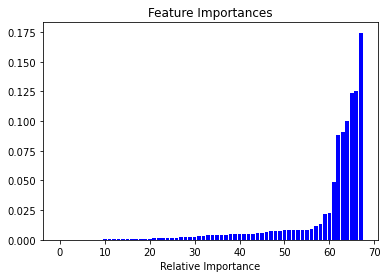

In [12]:
import matplotlib.pyplot as plt


features = list(train_set.columns)
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

In [13]:
features = []
imports = []
for feat, importance in zip(train_set_combined.columns, clf.feature_importances_):
    features.append(feat)
    imports.append(importance)
    print ('feature:', feat, 'importance: ',importance)

feature: geo_level_1_id importance:  0.17441644453204008
feature: geo_level_2_id importance:  0.12353765918131576
feature: geo_level_3_id importance:  0.125088411101474
feature: count_floors_pre_eq importance:  0.013241308545197937
feature: age importance:  0.09062242002055232
feature: area_percentage importance:  0.10034910435056787
feature: height_percentage importance:  0.04877740332641399
feature: has_superstructure_adobe_mud importance:  0.004411403223968227
feature: has_superstructure_mud_mortar_stone importance:  0.022789541017273346
feature: has_superstructure_stone_flag importance:  0.006028675499790485
feature: has_superstructure_cement_mortar_stone importance:  0.0024164740832818515
feature: has_superstructure_mud_mortar_brick importance:  0.004938179235575317
feature: has_superstructure_cement_mortar_brick importance:  0.008168999427650968
feature: has_superstructure_timber importance:  0.011678015093013625
feature: has_superstructure_bamboo importance:  0.00600342974244577

In [14]:
featImportance=pd.DataFrame()
featImportance['Feature']=features
featImportance['Importance']=imports
featImportance.sort_values(by='Importance').tail(10)

,Feature,Importance
3,count_floors_pre_eq,0.013241
18,count_families,0.021621
8,has_superstructure_mud_mortar_stone,0.022790
6,height_percentage,0.048777
35,foundation_type_r,0.088590
4,age,0.090622
5,area_percentage,0.100349
1,geo_level_2_id,0.123538
2,geo_level_3_id,0.125088
0,geo_level_1_id,0.174416


In [15]:
features = []
imports = []
for feat, importance in zip(train_set_combined.columns, rf_clf.feature_importances_):
    features.append(feat)
    imports.append(importance)
    print ('feature:', feat, 'importance: ',importance)
featImportance=pd.DataFrame()
featImportance['Feature']=features
featImportance['Importance']=imports
featImportance.sort_values(by='Importance').tail(10)

feature: geo_level_1_id importance:  0.13417183668136365
feature: geo_level_2_id importance:  0.13462119848896306
feature: geo_level_3_id importance:  0.1535681148552878
feature: count_floors_pre_eq importance:  0.01629780255722647
feature: age importance:  0.12248928386775522
feature: area_percentage importance:  0.11233461532015963
feature: height_percentage importance:  0.05553841485256484
feature: has_superstructure_adobe_mud importance:  0.007656880487142458
feature: has_superstructure_mud_mortar_stone importance:  0.013091893028586302
feature: has_superstructure_stone_flag importance:  0.005465604657793301
feature: has_superstructure_cement_mortar_stone importance:  0.003169690152270238
feature: has_superstructure_mud_mortar_brick importance:  0.005965503035793511
feature: has_superstructure_cement_mortar_brick importance:  0.008087003335332799
feature: has_superstructure_timber importance:  0.011642012456373781
feature: has_superstructure_bamboo importance:  0.006721013891518548

,Feature,Importance
8,has_superstructure_mud_mortar_stone,0.013092
35,foundation_type_r,0.015513
3,count_floors_pre_eq,0.016298
18,count_families,0.024660
6,height_percentage,0.055538
5,area_percentage,0.112335
4,age,0.122489
0,geo_level_1_id,0.134172
1,geo_level_2_id,0.134621
2,geo_level_3_id,0.153568


In [16]:
N = 3
# Drop first N columns of dataframe
train_set_combined.drop(columns=train_set_combined.columns[:N], 
        axis=1, 
        inplace=True)
train_set_combined

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,-0.178274,0.047100,-0.459460,-0.226419,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28830,-0.178274,-0.224765,-0.004110,0.816109,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
94947,-0.178274,-0.224765,-0.687135,-0.226419,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
590882,-0.178274,-0.224765,-0.459460,-0.226419,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
201944,1.195989,0.047100,-0.004110,1.858636,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,-1.552536,0.386932,-0.459460,-1.268946,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
669485,-0.178274,-0.360698,-0.459460,-0.226419,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
602512,1.195989,0.386932,-0.459460,0.816109,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_set_combined, train_label, test_size=0.2, random_state=42)

In [18]:
for i in range(1,25,1):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Depth: ",i," Accuracy:",metrics.accuracy_score(y_test, y_pred))


Depth:  1  Accuracy: 0.5657412559237159
Depth:  2  Accuracy: 0.5657412559237159
Depth:  3  Accuracy: 0.574183150745381
Depth:  4  Accuracy: 0.5743941981159225
Depth:  5  Accuracy: 0.5822221369505574
Depth:  6  Accuracy: 0.5845820302757047
Depth:  7  Accuracy: 0.5857523838759809
Depth:  8  Accuracy: 0.5872105293451776
Depth:  9  Accuracy: 0.5867884346040944
Depth:  10  Accuracy: 0.5935419504614263
Depth:  11  Accuracy: 0.5949233514322442
Depth:  12  Accuracy: 0.5960937050325205
Depth:  13  Accuracy: 0.5958826576619789
Depth:  14  Accuracy: 0.595498935170085
Depth:  15  Accuracy: 0.5939448590779148
Depth:  16  Accuracy: 0.5908367068935746
Depth:  17  Accuracy: 0.5900884480343815
Depth:  18  Accuracy: 0.5870186680992306
Depth:  19  Accuracy: 0.5836035379213753
Depth:  20  Accuracy: 0.5841599355346213
Depth:  21  Accuracy: 0.5819151589570423
Depth:  22  Accuracy: 0.5801500354943305
Depth:  23  Accuracy: 0.5781546785364824
Depth:  24  Accuracy: 0.5779820034151302


In [19]:

rf_clf = RandomForestClassifier(n_estimators = 500)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Accuracy: ",accuracy_score(rf_pred, y_test))

<ipython-input-19-e142b09ffc04>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Accuracy:  0.5921029911168243


In [20]:
features = []
imports = []
for feat, importance in zip(train_set_combined.columns, clf.feature_importances_):
    features.append(feat)
    imports.append(importance)
    print ('feature:', feat, 'importance: ',importance)
featImportance=pd.DataFrame()
featImportance['Feature']=features
featImportance['Importance']=imports
featImportance.sort_values(by='Importance').tail(10)

feature: count_floors_pre_eq importance:  0.02611759850080604
feature: age importance:  0.13194171845983535
feature: area_percentage importance:  0.15062727393400596
feature: height_percentage importance:  0.08881364257607507
feature: has_superstructure_adobe_mud importance:  0.01640434206983172
feature: has_superstructure_mud_mortar_stone importance:  0.03229763312649181
feature: has_superstructure_stone_flag importance:  0.015837852033628152
feature: has_superstructure_cement_mortar_stone importance:  0.007380172020770187
feature: has_superstructure_mud_mortar_brick importance:  0.012177933129737271
feature: has_superstructure_cement_mortar_brick importance:  0.02866139954086705
feature: has_superstructure_timber importance:  0.016075596378870436
feature: has_superstructure_bamboo importance:  0.014677613153523486
feature: has_superstructure_rc_non_engineered importance:  0.010275354577248754
feature: has_superstructure_rc_engineered importance:  0.0023118417537805426
feature: has_su

,Feature,Importance
10,has_superstructure_timber,0.016076
4,has_superstructure_adobe_mud,0.016404
0,count_floors_pre_eq,0.026118
9,has_superstructure_cement_mortar_brick,0.028661
5,has_superstructure_mud_mortar_stone,0.032298
15,count_families,0.037692
3,height_percentage,0.088814
1,age,0.131942
2,area_percentage,0.150627
32,foundation_type_r,0.154686


In [21]:
features = []
imports = []
for feat, importance in zip(train_set_combined.columns, rf_clf.feature_importances_):
    features.append(feat)
    imports.append(importance)
    print ('feature:', feat, 'importance: ',importance)
featImportance=pd.DataFrame()
featImportance['Feature']=features
featImportance['Importance']=imports
featImportance.sort_values(by='Importance').tail(10)

feature: count_floors_pre_eq importance:  0.02392985161328897
feature: age importance:  0.23021846753682748
feature: area_percentage importance:  0.22655052978523163
feature: height_percentage importance:  0.11161415548158288
feature: has_superstructure_adobe_mud importance:  0.01449074930032705
feature: has_superstructure_mud_mortar_stone importance:  0.021071437509326774
feature: has_superstructure_stone_flag importance:  0.010989602565085818
feature: has_superstructure_cement_mortar_stone importance:  0.006188438751423237
feature: has_superstructure_mud_mortar_brick importance:  0.010565769371019882
feature: has_superstructure_cement_mortar_brick importance:  0.013101223985169816
feature: has_superstructure_timber importance:  0.018099448032332294
feature: has_superstructure_bamboo importance:  0.011823922292652294
feature: has_superstructure_rc_non_engineered importance:  0.009218530093466923
feature: has_superstructure_rc_engineered importance:  0.0035285077032474414
feature: has_

,Feature,Importance
40,ground_floor_type_v,0.013721
4,has_superstructure_adobe_mud,0.014491
10,has_superstructure_timber,0.018099
5,has_superstructure_mud_mortar_stone,0.021071
32,foundation_type_r,0.021685
0,count_floors_pre_eq,0.023930
15,count_families,0.041449
3,height_percentage,0.111614
2,area_percentage,0.226551
1,age,0.230218
